<a href="https://colab.research.google.com/github/atulshah16/Machine-Learning/blob/master/Atul_Shah_014530243_CMP257_ML_Final_Exam_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Exam Submission 
# Alternus Vera data sets
Course code : **CMPE-257**     
Group name : **Invincibles**<br>
Name: **Atul Shah**<br>
Student ID: **014530243**<br>


GitHub URL: https://github.com/atulshah16/Machine-Learning

**Dataset:**
 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
 2. Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)
 3. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)

### Process
- Load the Data (Fake News Dataset)
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature :** Biases

- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
 

 
#### Enrichment Dataset Details
- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 



In [4]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:

test_filename="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/test.tsv"
train_filename="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/train.tsv"
valid_filename="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/valid.tsv"

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [6]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.12724576791127523 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.012561444441477458 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.012321841716766358 min


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [15]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim import models
model = gensim.models.KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

--2020-05-19 20:14:16--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.24.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.24.54|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [18]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 4.970853443940481 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [19]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.5683566093444824 min


In [20]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.6319735010464986 min


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("train_processed.csv", sep=',')
test_news.to_csv("test_processed.csv", sep=',')
valid_news.to_csv("valid_processed.csv", sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

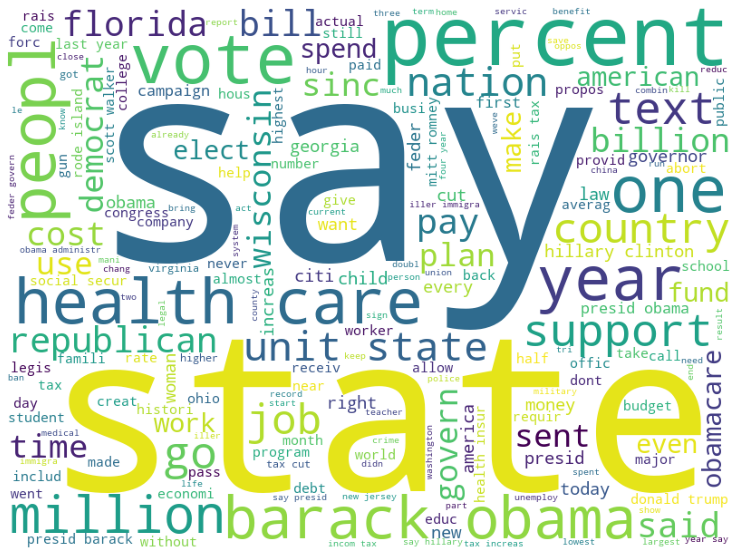

In [23]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

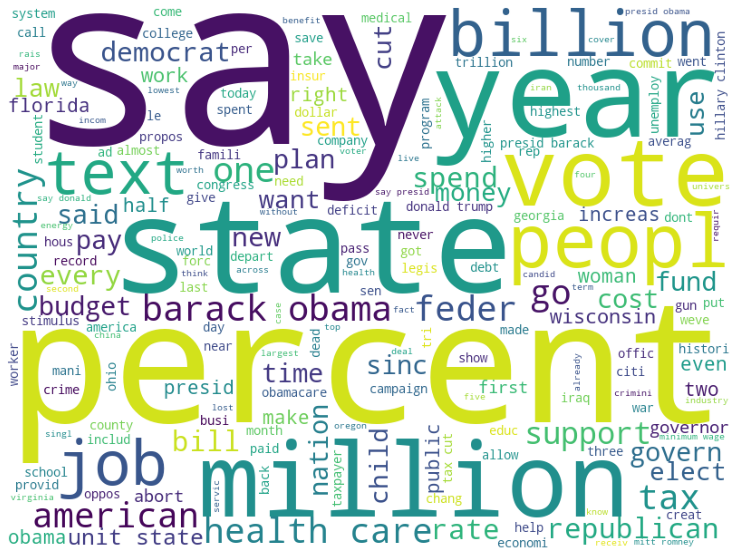

In [24]:
cloud(' '.join(test_news['clean']))

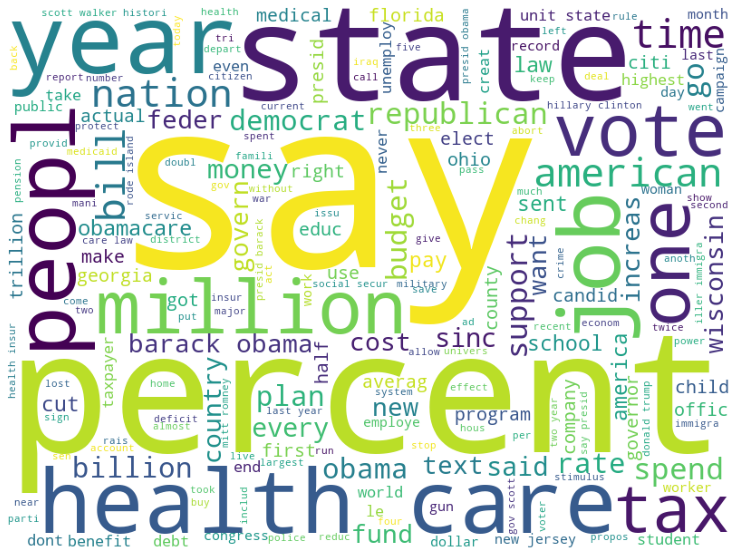

In [25]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus


# Feature 1: Sentiment analysis 

#### Using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [31]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

Streaming output truncated to the last 5000 lines.
[0, 0.197, 0.524, 0.279, 0.2363]
[0, 0.471, 0.529, 0.0, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.161, 0.518, 0.321, 0.4767]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.178, 0.822, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.746, 0.254, 0.7579]
[0, 0.181, 0.819, 0.0, -0.4767]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.87, 0.13, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.604, 0.396, 0.7096]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.659, 0.341, 0.4767]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.0, 0.913, 0.087, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.163, 0.

In [32]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [33]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

In [34]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [35]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

In [36]:
valid_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("train_sentiment.csv", sep=',')
test_news.to_csv("test_sentiment.csv", sep=',')
valid_news.to_csv("valid_sentiment.csv", sep=',')

In [38]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('test_sentiment.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.943918


(True, 0.9448046694778502)

In [39]:
SentimentAnalysis = SentimentAnalysis()

Sentiment Analysis Model Trained - accuracy:   0.943918


In [40]:
def DATAMINERS_getSentimentAnalysisScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = SentimentAnalysis.predict(text)
    return (float(probValue))

print(DATAMINERS_getSentimentAnalysisScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.9448046694778502


# Feature 2:  LDA Topic Modelling 


In [41]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [42]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [43]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


#### Split the clean news into list of words

In [44]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [53]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [54]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['vote', 'sent', 'republican', 'support', 'state', 'democrat', 'obama', 'romney', 'percent', 'would']
1::['percent', 'state', 'time', 'averag', 'american', 'school', 'year', 'hous', 'billion', 'rais']
2::['presid', 'obama', 'country', 'bill', 'barack', 'state', 'bush', 'year', 'billion', 'florida']
3::['year', 'percent', 'school', 'would', 'budget', 'public', 'every', 'state', 'obama', 'spend']
4::['obama', 'state', 'nation', 'said', 'million', 'peopl', 'work', 'presid', 'clinton', 'text']
5::['percent', 'year', 'million', 'state', 'obama', 'time', 'rate', 'peopl', 'presid', 'wisconsin']
6::['percent', 'increas', 'american', 'peopl', 'state', 'year', 'health', 'sinc', 'care', 'vote']
7::['year', 'last', 'state', 'million', 'health', 'vote', 'creat', 'number', 'nation', 'would']
8::['health', 'care', 'state', 'year', 'cost', 'would', 'percent', 'plan', 'insur', 'budget']
9::['state', 'trump', 'unit', 'donald', 'georgia', 'want', 'clinton', 'percent', 'feder', 'iller']


#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [55]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [56]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['budget', 'billion', 'state', 'medical', 'deficit', 'presid', 'year', 'spend', 'obama', 'barack']
1::['percent', 'state', 'democrat', 'plan', 'school', 'support', 'year', 'iller', 'america', 'expand']
2::['state', 'school', 'year', 'trump', 'fund', 'percent', 'reagan', 'dont', 'donald', 'public']
3::['percent', 'presid', 'obama', 'year', 'time', 'rate', 'unemploy', 'barack', 'vote', 'averag']
4::['state', 'year', 'unit', 'immigra', 'peopl', 'text', 'percent', 'iller', 'never', 'deal']
5::['health', 'care', 'romney', 'mitt', 'famili', 'percent', 'year', 'increas', 'governor', 'john']
6::['county', 'state', 'percent', 'wage', 'govern', 'health', 'already', 'insur', 'million', 'minimum']
7::['american', 'obama', 'percent', 'year', 'presid', 'privat', 'barack', 'child', 'abort', 'muslim']
8::['vote', 'state', 'million', 'woman', 'rubio', 'wall', 'country', 'marco', 'every', 'democrat']
9::['secur', 'court', 'social', 'rick', 'scott', 'sent', 'vote', 'percent', 'want', 'rais']


#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [58]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642002,obama state nation said million peopl work pre...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930748,percent year million state obama time rate peo...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486886,percent increas american peopl state year heal...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654623,health care state year cost would percent plan...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.454690,year last state million health vote creat numb...


In [59]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.871365,obama state nation said million peopl work pre...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.626577,year last state million health vote creat numb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.551877,health care state year cost would percent plan...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849980,health care state year cost would percent plan...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574378,health care state year cost would percent plan...


In [60]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699911,obama state nation said million peopl work pre...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.599063,presid obama country bill barack state bush ye...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.558868,obama state nation said million peopl work pre...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,4,0.849964,obama state nation said million peopl work pre...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,0,0.575555,vote sent republican support state democrat ob...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

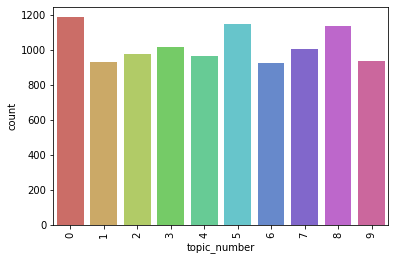

In [61]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

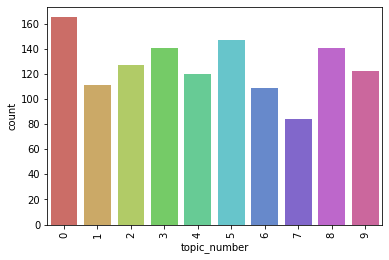

In [62]:
create_distribution(test_news)# TEST Document Vector

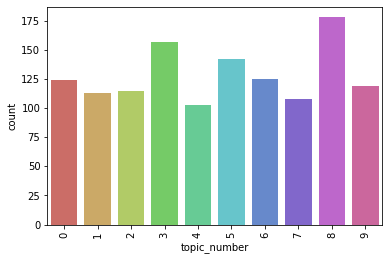

In [63]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("train_lda.csv", sep=',')
test_news.to_csv("test_lda.csv", sep=',')
valid_news.to_csv("valid_lda.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('test_lda.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# lda = LDATopicModelling()
# lda.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [66]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.328594


In [67]:
def DATAMINERS_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DATAMINERS_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.08185803576455541


##### Saved the latest dataset into a seperate CSV file 

#### Read the input data files

# Feature 10 : Word Frequency

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv(train_filename, sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv(valid_filename, sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv(test_filename, sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [78]:
# from ipynb.fs.full.m_wordfrequency import WordFrequency
wordFrequency = WordFrequency()

Word Frequency Model Trained - accuracy:   0.599053


In [79]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5104703891221551


# FINAL COMBINED MODEL

In [80]:
# import warnings
# warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.84, 0.56, 0.95, 0.35,  0.1 ,0.54, 0.98, 0.71, 0.6, 1] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    sumW += w[0]
    
    if (headline != ""):
        prob.append(w[3] * DATAMINERS_getSentimentAnalysisScore(headline))
        sumW += w[3]
    if (headline != ""):
        prob.append(w[4] * DATAMINERS_getLDATopicModellingScore(headline))
        sumW += w[4]
    
    prob.append(w[8] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[8]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if result > 0.5:
    print("is FAKE NEWS!!!")
else:
    print("it is NOT fake news!!!")
            

it is NOT fake news!!!


# **Fake News Data Set**

In [83]:
import pandas as pd
import numpy as np
import csv
import gensim
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
import matplotlib.pyplot as plt
import requests
import re
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import *
import plotly
import io
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix



# **DATA IMPORTING**

In [0]:
# Kaggle Fake news dataset
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/fake.csv"
url1="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/true.csv"
file=requests.get(url).content
fake_news=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
file1=requests.get(url1).content
real_news=pd.read_csv(io.StringIO(file1.decode('utf-8')),sep=',')


In [86]:
print(fake_news.shape)
print(real_news.shape)

(12999, 20)
(0, 1)


In [87]:
print(fake_news.describe())
fake_news.head()

       ord_in_thread   domain_rank  ...      comments        shares
count   12999.000000   8776.000000  ...  12999.000000  12999.000000
mean        0.891530  38092.996582  ...      0.038311     10.831833
std         6.486822  26825.487454  ...      0.827335     79.798949
min         0.000000    486.000000  ...      0.000000      0.000000
25%         0.000000  17423.000000  ...      0.000000      0.000000
50%         0.000000  34478.000000  ...      0.000000      0.000000
75%         0.000000  60570.000000  ...      0.000000      0.000000
max       100.000000  98679.000000  ...     65.000000    988.000000

[8 rows x 8 columns]


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


# **DATA PRE-PROCESSING**

In [88]:
column_names = list(fake_news.columns)
print(column_names)
for column in column_names:
    if fake_news[column].count()<len(fake_news):
        print(column,fake_news[column].count())     
        
fake_news.loc[fake_news['text'].isnull(),'text'] = ''
fake_news.loc[fake_news['country'].isnull(),'country'] = 'US' 
fake_news.loc[fake_news['author'].isnull(),'author'] = fake_news.loc[fake_news['author'].isnull(),'country']
fake_news.loc[fake_news['thread_title'].isnull(),'thread_title'] = ''
fake_news.loc[fake_news['domain_rank'].isnull(),'domain_rank'] = np.nanmedian(np.array(fake_news['domain_rank'])) 

['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type']
author 10575
title 12319
text 12953
country 12823
domain_rank 8776
thread_title 12987
main_img_url 9356


In [0]:
pstem = PorterStemmer()
stop = set(stopwords.words('english'))

def stemmer(text):
    wordlist = text.strip().split()
    pstem = PorterStemmer()
    j = '';
    for word in wordlist:
        try:
            j = j+pstem.stem(word)+' '
        except: 
            print(text)
    return j

fake_news['text_lower'] = fake_news['text'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: stemmer(x))
fake_news['thread_lower'] = fake_news['thread_title'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([pstem.stem(word) for word in x.strip().split()]))
fake_news['num_words'] = fake_news['text_lower'].map(lambda x: len(str(x).strip().split()))

# **TF-IDF && COSINE SIMILARITY**

In [90]:
def similarity(t1,t2):
    t = [t1,t2]
    tfidf_vectorizer = TfidfVectorizer()
    try:
        vectors = tfidf_vectorizer.fit_transform(t)
        vectors = vectors.toarray()
        sim = cosine_similarity(vectors[0].reshape(1,-1),vectors[1].reshape(1,-1))[0]
    except:
        sim = 0
    return sim

fake_news['similarity'] = [similarity(b['text_lower'],b['thread_lower']) for (a,b) in fake_news.iterrows()]
fake_news['similarity'].describe() 

count    12999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: similarity, dtype: float64

In [91]:
countries = list(fake_news['country'].unique())
fake_news['country_number'] = fake_news['country'].map(lambda x: countries.index(x))
fake_news['country_number'].describe()

count    12999.000000
mean         1.530348
std          4.034031
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: country_number, dtype: float64

In [92]:
languages = list(fake_news['language'].unique())
fake_news['language_number'] = fake_news['language'].map(lambda x: languages.index(x))
fake_news['language_number'].describe()

count    12999.000000
mean         0.206170
std          1.056325
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: language_number, dtype: float64

In [93]:
fake_news.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0


In [94]:
fake_news['index'] = fake_news.index
data = fake_news
train_lda = data[['text_lower', 'index','thread_lower']]
train_lda.head(4)

,text_lower,index,thread_lower
0,print pay back money plu interest entir famili...,0,muslim bust stole million govt benefit
1,attorney gener loretta lynch plead fifth barra...,1,attorney gener loretta lynch plead fifth
2,red state fox news sunday report morn anthoni ...,2,break weiner cooper fbi hillari email investig
3,email kayla mueller prison tortur isi chanc re...,3,pin drop speech father daughter kidnap kill is...


In [95]:
processed_docs = train_lda['text_lower'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [print, pay, back, money, plu, interest, entir...
1    [attorney, gener, loretta, lynch, plead, fifth...
2    [red, state, fox, news, sunday, report, morn, ...
3    [email, kayla, mueller, prison, tortur, isi, c...
Name: text_lower, dtype: object

## **LDA TOPIC MODELLING**

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = fake_news['text_lower'].map(get_word_tokens)

In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [0]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

In [104]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(fake_news,'text_lower')

######## DICTIONARY Words and occurences ########
0 
1 anoth
2 asap
3 back
4 benefit
5 bust
6 came
7 case
8 commit
9 control
10 deport

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (39, 1), (40, 1)]

 ######## PREVIEW BOW ########
Word 0 ("anoth") appears 1 time.
Word 1 ("asap") appears 1 time.
Word 2 ("back") appears 1 time.
Word 3 ("benefit") appears 1 time.
Word 4 ("bust") appears 1 time.
Word 5 ("came") appears 1 time.
Word 6 ("case") appears 1 time.
Word 7 ("commit") appears 1 time.
Word 8 ("control") appears 1 time.
Word 9 ("deport") appears 1 time.
Word 10 ("entir") appears 1 time.
Word 11 ("everyon") appears 1 time.
Word 12 ("famili") appears 1 time.
Word 13 ("four") appears 1 time.
Word 14

In [105]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['clinton', 'email', 'investig', 'state', 'report', 'hillari', 'comey', 'said', 'time', 'would']
1::['clinton', 'trump', 'hillari', 'presid', 'email', 'would', 'campaign', 'state', 'elect', 'donald']
2::['trump', 'vote', 'elect', 'peopl', 'state', 'clinton', 'democrat', 'american', 'hillari', 'said']
3::['russia', 'state', 'syria', 'would', 'govern', 'presid', 'countri', 'russian', 'said', 'peopl']
4::['govern', 'peopl', 'state', 'would', 'pipelin', 'said', 'american', 'like', 'year', 'time']
5::['russian', 'para', 'email', 'state', 'russia', 'clinton', 'como', 'would', 'said', 'peopl']
6::['like', 'american', 'state', 'make', 'trump', 'peopl', 'time', 'news', 'world', 'media']
7::['state', 'obama', 'govern', 'would', 'peopl', 'year', 'presid', 'world', 'nation', 'american']
8::['peopl', 'world', 'state', 'time', 'like', 'would', 'nation', 'year', 'govern', 'said']
9::['peopl', 'time', 'like', 'year', 'also', 'mani', 'said', 'make', 'world', 'even']


In [106]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.08275387447287372),
 (1, 0.34732052969890836),
 (2, 0.07326793123378836),
 (3, 0.146331237598883),
 (4, 0.25694326941888074),
 (5, 0.11662671651052897),
 (6, 0.09549975200972269),
 (7, 0.13631871057630102),
 (8, 0.10015156364799924),
 (9, 0.2379558140945087),
 (10, 0.11149877411061139),
 (11, 0.12770346764229712),
 (12, 0.11049626377938052),
 (13, 0.12894216192330096),
 (14, 0.16855163938296797),
 (16, 0.1459631358268953),
 (17, 0.18387168545296842),
 (18, 0.09728486080549911),
 (19, 0.04477612682794822),
 (20, 0.09446475108984374),
 (21, 0.11242309807054697),
 (22, 0.0991542140769561),
 (23, 0.1610887765005904),
 (24, 0.0722250290867347),
 (25, 0.172930134785294),
 (28, 0.15824510936044836),
 (29, 0.10483182972694496),
 (30, 0.06246753942894103),
 (31, 0.25567781643453247),
 (32, 0.354172583742926),
 (33, 0.1941392224492906),
 (34, 0.2811175996848103),
 (35, 0.06038995036960375),
 (36, 0.21971785906891358),
 (39, 0.157161265715028),
 

In [107]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['cancer', 'vaccin', 'studi', 'diseas', 'research', 'chemic', 'health', 'food', 'bodi', 'blood']
1::['franai', 'espaol', 'para', 'president', 'trke', 'moon', 'deutsch', 'sich', 'sobr', 'pour']
2::['telegram', 'banco', 'meyssan', 'noviembr', 'that', 'knew', 'hodg', 'receipt', 'turmer', 'fifteen']
3::['pipelin', 'dakota', 'protest', 'rock', 'water', 'text', 'stand', 'polic', 'sioux', 'protector']
4::['wearechang', 'assang', 'facebook', 'sheriff', 'convers', 'clinton', 'comment', 'sourc', 'guest', 'russian']
5::['fukushima', 'josh', 'pussi', 'guccif', 'garner', 'water', 'switch', 'eddi', 'radioact', 'hydrogen']
6::['trump', 'clinton', 'hillari', 'vote', 'elect', 'email', 'peopl', 'investig', 'presid', 'state']
7::['syria', 'russia', 'syrian', 'russian', 'trump', 'terrorist', 'militari', 'saudi', 'aleppo', 'putin']
8::['para', 'pravdaru', 'estado', 'como', 'unido', 'portugu', 'president', 'danney', 'ministro', 'estadounidens']
9::['marijuana', 'cannabi', 'italiano', 'rudkowski', 'luke',

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [109]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
fake_newss = update_lda_results_to_dataset(
    fake_news, headlinetopiccolnames,'text_lower', dictionary_headline, lda_model_headline, lda_headline_topic_words)
fake_newss.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0,2,0,0.991962,clinton email investig state report hillari co...
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email kayla mueller prison tortur isi chanc re...,pin drop speech father daughter kidnap kill is...,29,0,0,0,3,1,0.954989,clinton trump hillari presid email would campa...
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email healthcar reform make america great sinc...,fantast trump point plan reform healthcar begi...,196,0,0,0,4,2,0.525675,trump vote elect peopl state clinton democrat ...


In [110]:
train_data, validate_data, test_data = np.split(fake_newss.sample(frac=1), [int(.6*len(fake_newss)), int(.8*len(fake_newss))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 7799
Size of validation set: 2600
Size of testing set: 2600


In [111]:
train_data.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,d686873e40ee318659edc201b83deeb91ce0d165,0,Rowan Wolf,2016-11-05T18:51:57.904+02:00,Iraqis in Mosul Find US Missiles at Captured I...,[Photo: US missiles found in ISIS stronghold i...,english,2016-11-05T18:51:57.904+02:00,greanvillepost.com,US,34478.0,Iraqis in Mosul Find US Missiles at Captured I...,0.000,NaN,0,1,0,0,0,bs,photo us missil found isi stronghold mosul ira...,iraqi mosul find us missil captur islam state ...,503,0,0,0,4184,3,0.861897,russia state syria would govern presid countri...
1,1f480295cd7e931f7e405cd6644c3238a29c4229,0,beforeitsnews.com,2016-10-26T19:47:00.000+03:00,The Latest Stock Market and Investing Books | ...,(Before It's News) If you re looking for new a...,english,2016-10-26T22:03:02.791+03:00,beforeitsnews.com,US,6659.0,The Latest Stock Market and Investing Books | ...,0.001,https://ir-na.amazon-adsystem.com/e/ir?t=antiq...,0,1,0,0,0,bs,news look new interest book read holiday relat...,latest stock market invest book financi market,81,0,0,0,1150,7,0.893921,state obama govern would peopl year presid wor...
2,4f97273abf0a7cd45288eddaa1eae2b3c061d03e,0,TV,2016-11-04T05:41:00.000+02:00,A Unique Discovery! Secret Egyptian Tomb Full ...,A Unique Discovery! Secret Egyptian Tomb Full ...,english,2016-11-04T09:07:00.693+02:00,disclose.tv,TV,25709.0,A Unique Discovery! Secret Egyptian Tomb Full ...,0.000,http://d38zt8ehae1tnt.cloudfront.net/the_uniqu...,0,0,0,0,0,bs,uniqu discoveri secret egyptian tomb full trea...,uniqu discoveri secret egyptian tomb full treasur,76,0,13,0,2782,8,0.770494,peopl world state time like would nation year ...


In [0]:
# train_data['type']=pd.factorize(train_data['type'])[0]

In [0]:
# smote = SMOTE(sampling_strategy='auto')
# train_data = smote.fit_sample(train_data.drop(['type'],axis=1),train_data['type'])

In [114]:
fake_newss.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0,2,0,0.991962,clinton email investig state report hillari co...


In [0]:
# x = fake_newss.drop(['type'],axis=1)
# y=fake_news['type']
# smote = SMOTE(sampling_strategy='auto')
# x_train,y_train = smote.fit_sample(x_train,y_train)

In [116]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


## --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Social Credibility - Shreyus

In [0]:
x = fake_newss[['likes','comments','shares','participants_count']]
y=fake_news['type']

In [0]:
y= pd.factorize(y)[0]

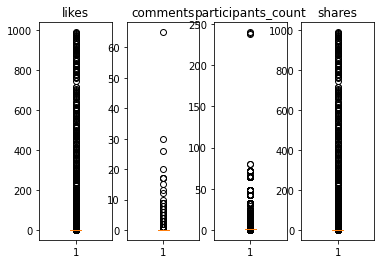

In [119]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].boxplot(x['likes'])
axes[0].set_title('likes')
axes[1].boxplot(x['comments'])
axes[1].set_title('comments')
axes[2].boxplot(x['participants_count'])
axes[2].set_title('participants_count')
axes[3].boxplot(x['shares'])
axes[3].set_title('shares')

fig.savefig("boxplots.png")

In [0]:
num=['likes','comments','shares','participants_count']

In [121]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,likes,988,0,79.798949,10.831833
1,comments,65,0,0.827335,0.038311
2,shares,988,0,79.798949,10.831833
3,participants_count,240,0,6.884239,1.727518


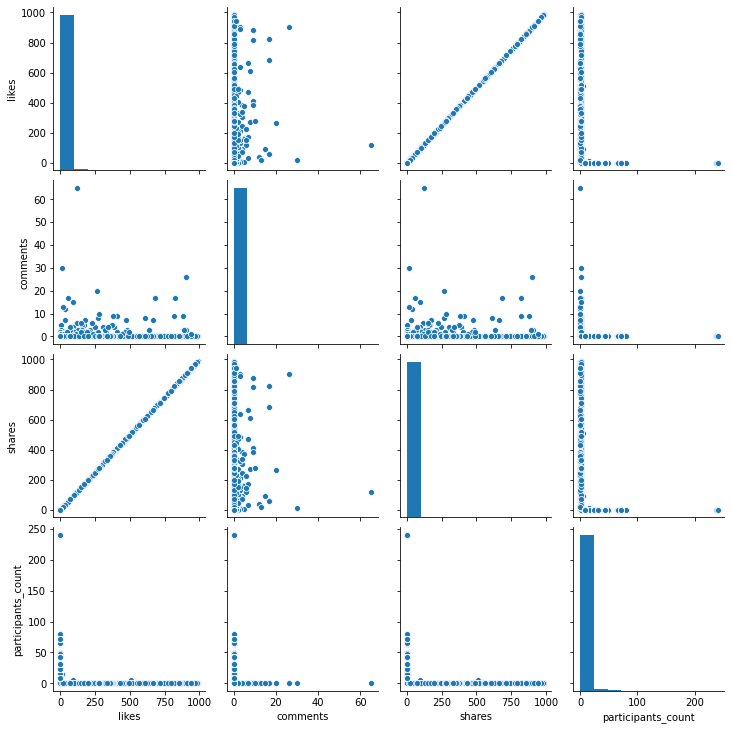

In [122]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [123]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
x_train_soc ,x_test_soc,y_train_soc,y_test_soc = train_test_split(x,y,test_size=0.3)

### SVM

In [0]:
from sklearn import svm
def shr_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def shr_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def shr_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### XG BOOST

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def shr_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())
  #shreyus_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  return accuracy


In [0]:
 # XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def shr_social_credibility_score(sample):
  x_sample = sample[['likes','comments','shares','participants_count']]
  y_sample=sample['type']
  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(x_train_soc,y_train_soc)

  y_pred = xg.predict(x_sample)

  
  accuracy = accuracy_score(y_sample,y_pred.round())
  #shreyus_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  predicedProb = 1- xg.predict_proba(x_sample)[:,1]
  return predicedProb

### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def shr_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #shreyus_knn=round(accuracy_score(y_test, y_hat.round())*100,2)
    return ({'f1score':f1score,'ACCURACY':accuracy})

In [131]:
shr_linearsvmclf(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

LinearSVC


{'ACCURACY': 0.8838461538461538, 'f1score': 0.8402146529367289}

In [132]:
shr_naive_bayes(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

GaussianNB


{'ACCURACY': 0.06897435897435897, 'f1score': 0.07138781181314059}

In [133]:
shr_randomforest(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

RandomForestClassifier


{'ACCURACY': 0.8764102564102564, 'f1score': 0.8416951297288905}

In [134]:
shr_xgboost(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

XG Boost algorithm


0.8905128205128205

In [135]:
shr_knn(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

KNeighborsClassifier


{'ACCURACY': 0.8851282051282051, 'f1score': 0.845929510438539}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# CREDIBILITY AND REALIABILITY

In [136]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


In [0]:
x = fake_newss[['domain_rank','replies_count','participants_count']]
y=fake_news['type']

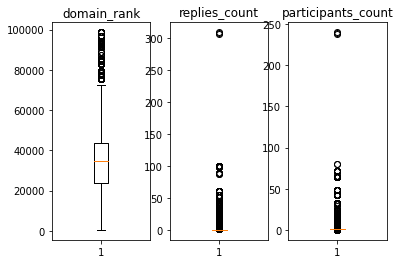

In [138]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(x['domain_rank'])
axes[0].set_title('domain_rank')
axes[1].boxplot(x['replies_count'])
axes[1].set_title('replies_count')
axes[2].boxplot(x['participants_count'])
axes[2].set_title('participants_count')


fig.savefig("boxplots.png")

In [0]:
num=['domain_rank','replies_count','participants_count']

In [140]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,domain_rank,98679.000000,486.000000,22106.012346,36918.588507
1,replies_count,309.000000,0.000000,9.656838,1.383183
2,participants_count,240.000000,0.000000,6.884239,1.727518


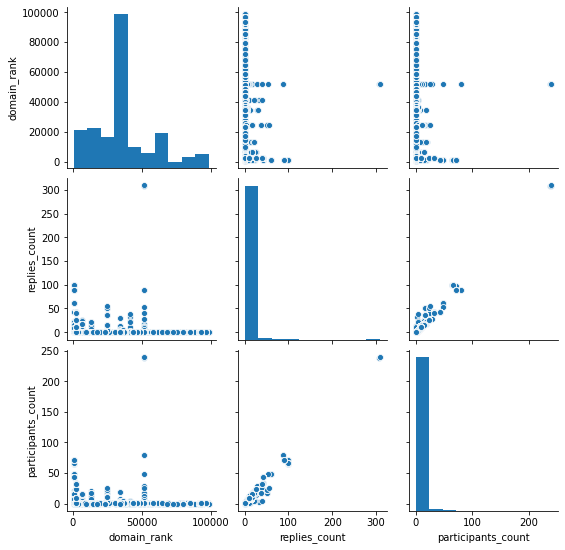

In [141]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [142]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
y= pd.factorize(y)[0]

In [0]:
x_train_cred ,x_test_cred,y_train_cred,y_test_cred = train_test_split(x,y,test_size=0.3)

## SVM

In [0]:
from sklearn import svm
def sha_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def sha_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def sha_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sha_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())
  #sai_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return accuracy

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sha_reliability_score(sample):

  x_sample=sample[['domain_rank','replies_count','participants_count']]
  y_sample=sample['type']
  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(x_train_cred,y_train_cred)

  y_pred = xg.predict(x_sample)


  accuracy = accuracy_score(y_sample,y_pred.round())
  #sai_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  
  predicedProb =1- xg.predict_proba(x_sample)[:,1]
  return predicedProb

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def sha_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_knn=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [151]:
x_test_cred.shape

(3900, 3)

In [152]:
sha_linearsvmclf(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

LinearSVC


{'ACCURACY': 0.8864102564102564, 'f1score': 0.8358126131560369}

In [153]:
sha_naive_bayes(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

GaussianNB


{'ACCURACY': 0.31384615384615383, 'f1score': 0.4291971316264128}

In [154]:
sha_randomforest(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

RandomForestClassifier


{'ACCURACY': 0.9833333333333333, 'f1score': 0.9813583132793109}

In [155]:
sha_xgboost(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

XG Boost algorithm


0.9841025641025641

In [156]:
sha_knn(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

KNeighborsClassifier


{'ACCURACY': 0.9841025641025641, 'f1score': 0.9821140529680543}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# NAIVE REALISM

In [157]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


In [0]:
x = fake_newss[['lda_score','spam_score','domain_rank']]
y=fake_news['type']

In [0]:
y= pd.factorize(y)[0]

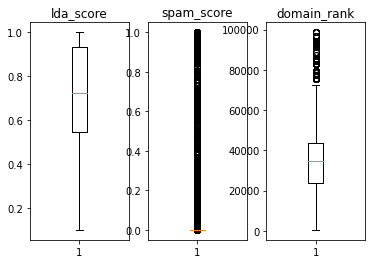

In [160]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(x['lda_score'])
axes[0].set_title('lda_score')
axes[1].boxplot(x['spam_score'])
axes[1].set_title('spam_score')
axes[2].boxplot(x['domain_rank'])
axes[2].set_title('domain_rank')


fig.savefig("boxplots.png")

In [0]:
num=['lda_score','spam_score','domain_rank']

In [162]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,lda_score,0.999692,0.100000,0.220710,0.717286
1,spam_score,1.000000,0.000000,0.122889,0.026122
2,domain_rank,98679.000000,486.000000,22106.012346,36918.588507


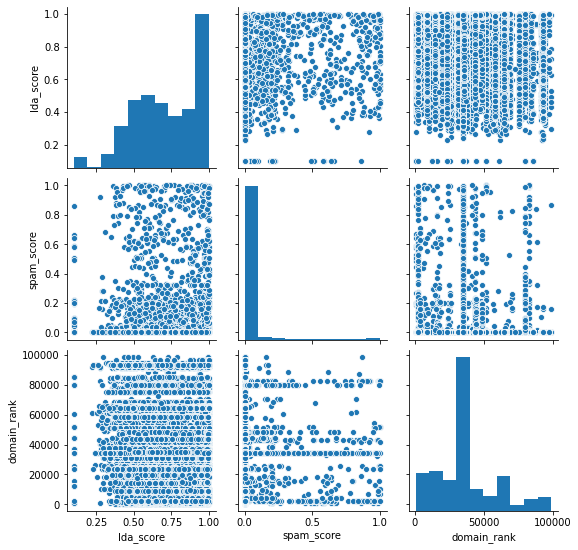

In [163]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [164]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
x_train_nr ,x_test_nr,y_train_nr,y_test_nr = train_test_split(x,y,test_size=0.3)

## SVM

In [0]:
from sklearn import svm
def sri_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def sri_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def sri_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sri_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())

  #sri_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return accuracy

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sri_naive_realism_score(sample):
  print("setting features:")
  x_sample=sample[['lda_score','spam_score','domain_rank']]
  print("setting target:")
  y_sample=sample['type']

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  print("Fitting XG Boost algorithm")
  xg=xg.fit(x_train_nr,y_train_nr)
  print("Predicting XG Boost algorithm")
  y_pred = xg.predict(x_sample)
  print("Accuracy XG Boost algorithm")
  
  accuracy = accuracy_score(y_sample,y_pred.round())
  predicedProb =1- xg.predict_proba(x_sample)[:,1]
  print (accuracy)
  print (predicedProb)
  #sri_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return predicedProb

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def sri_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sri_knn=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [172]:
sri_linearsvmclf(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

LinearSVC


{'ACCURACY': 0.20666666666666667, 'f1score': 0.2984843616178442}

In [173]:
sri_naive_bayes(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

GaussianNB


{'ACCURACY': 0.8817948717948718, 'f1score': 0.8264048410144609}

In [174]:
sri_randomforest(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

RandomForestClassifier


{'ACCURACY': 0.9661538461538461, 'f1score': 0.9708839402780133}

In [175]:
sri_xgboost(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

XG Boost algorithm


0.9823076923076923

In [176]:
sri_knn(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

KNeighborsClassifier


{'ACCURACY': 0.9823076923076923, 'f1score': 0.9801827820205099}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# BIAS

In [177]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


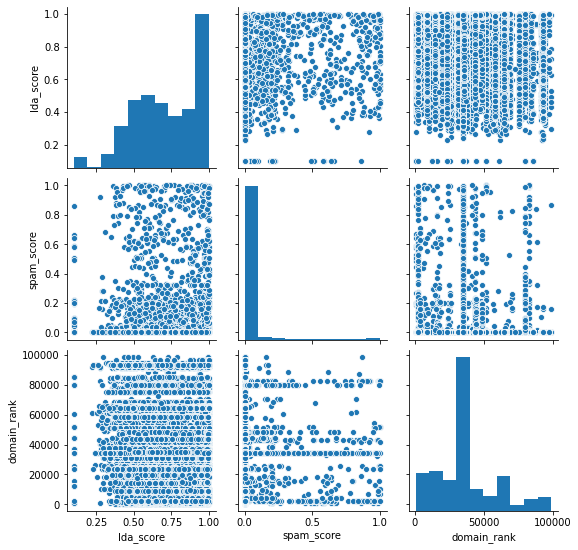

In [178]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [179]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')

fake_news = fake_newss[fake_newss["type"] == "fake"]

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
words = nltk.word_tokenize(" ".join(all_text.tolist()))

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


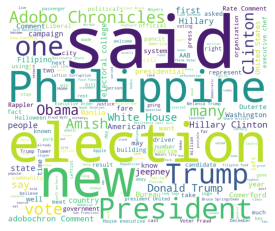

In [180]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [0]:
bigrams = nltk.bigrams(cleanwords)

In [182]:
# look at the most common. 

from collections import Counter
counter = Counter(bigrams)
print(counter.most_common(10))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


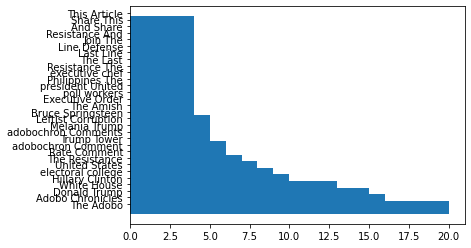

In [183]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width, labels)
plt.show()

In [0]:
x = fake_newss['text_lower']
y=fake_newss['type']

In [0]:
y= pd.factorize(y)[0]

In [0]:
x_train_bias ,x_test_bias,y_train_bias,y_test_bias = train_test_split(x,y,test_size=0.3)

### SVM

In [0]:
def atul_svm(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

### NAIVE BAYES

In [0]:
def atul_nb(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

### XG BOOST

In [0]:

def atul_xgb(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])
  model = pipe.fit(x_train_bias, y_train_bias)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return accuracy


In [0]:
def atul_bias_score(sample):

   x_sample=sample['text_lower']
   y_sample=sample['type']
  


   pipe = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('model', XGBClassifier(loss = 'deviance',
                                                    learning_rate = 0.01,
                                                    n_estimators = 10,
                                                    max_depth = 5,
                                                    random_state=2020))])
   model = pipe.fit(x_train_bias, y_train_bias)
   
   prediction = model.predict(x_sample)
   

   #accuracy = accuracy_score(y_sample.values,prediction.round())   
   predicedProb = model.predict_proba(x_sample)[:,1]

   return predicedProb
 

### RANDOM FOREST

In [0]:
def atul_rf(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  # atul_svm=round(accuracy_score(y_test, prediction)*100,2)
  return ({'f1score':f1score,'ACCURACY':accuracy})

### KNN

In [0]:
def atul_knn(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  # atul_svm=round(accuracy_score(y_test, prediction)*100,2)
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

In [193]:
atul_svm(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 90.05%


{'ACCURACY': 0.9005128205128206, 'f1score': 0.8719244568223469}

In [194]:
atul_nb(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 87.74%


{'ACCURACY': 0.8774358974358974, 'f1score': 0.8201545045139692}

In [195]:
atul_xgb(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 90.0%


0.9

In [196]:
atul_rf(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 89.54%


{'ACCURACY': 0.8953846153846153, 'f1score': 0.8595840720582261}

In [197]:
atul_knn(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 88.62%


{'ACCURACY': 0.8861538461538462, 'f1score': 0.8462304626257248}

## **FINAL COMBINED MODEL**

In [0]:
x_combined = fake_newss[['domain_rank','replies_count','participants_count','likes','comments','shares','text_lower','lda_score','spam_score']]

y_combined=fake_newss['type']

In [0]:
y_combined= pd.DataFrame(pd.factorize(y_combined)[0],columns=['type'])

In [0]:
data_combined=pd.concat([x_combined, y_combined], axis=1)

###Preparing a sample record for validation

In [0]:
sample=data_combined.iloc[0:1]

In [202]:
sample

,domain_rank,replies_count,participants_count,likes,comments,shares,text_lower,lda_score,spam_score,type
0,25689.0,0,1,0,0,0,print pay back money plu interest entir famili...,0.492957,0.0,0


In [0]:
def getNewsType(sample):

     accuracy_atul=atul_xgb(x_train_bias,y_train_bias,x_test_bias,y_test_bias)
     accuracy_sha=sha_xgboost(x_train_cred,y_train_cred,x_test_cred,y_test_cred)
     accuracy_shreyus=shr_xgboost(x_train_soc,y_train_soc,x_test_soc,y_test_soc)
     accuracy_sri=sri_xgboost(x_train_nr,y_train_nr,x_test_nr,y_test_nr)
     accur=[accuracy_atul,accuracy_sha,accuracy_shreyus,accuracy_sri]
  
     w = [float(i)/sum(accur) for i in accur]
     print(w)
     sumW = 0
     prob = []
     
     prob.append(w[0] * atul_bias_score(sample))
     prob.append(w[1] * sha_reliability_score(sample))
     sumW += w[1]
     prob.append(w[2] * shr_social_credibility_score(sample))
     sumW += w[2]
     prob.append(w[3] * sri_naive_realism_score(sample))
     sumW += w[3]

     probTotal = sum(prob[0:len(prob)]) / sumW
     return probTotal 

In [204]:
result = getNewsType(sample) 

accuracy: 90.0%
XG Boost algorithm
XG Boost algorithm
XG Boost algorithm
[0.23955773955773954, 0.26194376194376195, 0.23703248703248703, 0.26146601146601145]
XG Boost algorithm
XG Boost algorithm
setting features:
setting target:
XG Boost algorithm
Fitting XG Boost algorithm
Predicting XG Boost algorithm
Accuracy XG Boost algorithm
1.0
[0.99941003]


**Fake news category is determined with the confidence of 99% accuracy.**

# **BERT Transformer and Distilations**

In [205]:
!pip install transformers
!pip install tensorflow==2.1.0

     |████████████████████████████████| 645kB 3.2MB/s 
     |████████████████████████████████| 3.8MB 15.8MB/s 
     |████████████████████████████████| 890kB 44.4MB/s 
     |████████████████████████████████| 1.1MB 44.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=72ab389a30b01714544fd27e43bcca1772c67f2a76886e346185d091d5d6c5fe
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.9MB 42.0MB/s 
     |████████████████████████████████| 450kB 44.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=402ec1ef6c6f650db46f84a7338676d7cb3be83f37309150f170bf0ece9c6096
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10

In [206]:
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer

torch.set_grad_enabled(False)

In [207]:
MODEL_NAME = "bert-base-cased"

# We need to create the model and tokenizer
model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [209]:
from transformers import DistilBertModel

bert_distil = DistilBertModel.from_pretrained('distilbert-base-cased')
input_pt = tokenizer.encode_plus(
    'Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them. Here we go again another group stealing from the government and taxpayers. A group of Somalis stole over four million in government benefits over just 10 months', 
    return_tensors="pt"
)

%time _ = bert_distil(input_pt['input_ids'])
#%time _ = model_pt(input_pt['input_ids'])

CPU times: user 166 ms, sys: 4.04 ms, total: 170 ms
Wall time: 268 ms


In [210]:
# Let's load German BERT from the Bavarian State Library
from transformers import TFBertModel, BertModel
de_bert = BertModel.from_pretrained("dbmdz/bert-base-german-cased")
de_tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-german-cased")

de_input = de_tokenizer.encode_plus(sample['text_lower'],
 #   "Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them. Here we go again another group stealing from the government and taxpayers. A group of Somalis stole over four million in government benefits over just 10 months",
    return_tensors="pt"
)
print("Tokens (int)      : {}".format(de_input['input_ids'].tolist()[0]))
print("Tokens (str)      : {}".format([de_tokenizer.convert_ids_to_tokens(s) for s in de_input['input_ids'].tolist()[0]]))
print("Tokens (attn_mask): {}".format(de_input['attention_mask'].tolist()[0]))
print()

#output_de, pooled_de = de_bert(**de_input)

#print("Token wise output: {}, Pooled output: {}".format(outputs.shape, pooled.shape))

ValueError: ignored

### **Final Exam Review and Conclusion**

**1. What are the biggest impact features for your factor? using liar liar, and adding a second dataset.**

  The biggest 4 factors from Liar Liar and Fake News datasets are determined based on correlation plots and XGBoost:

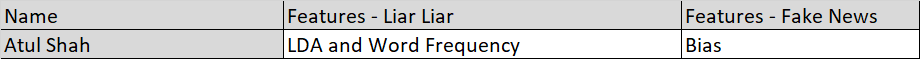

**2. compare : with columns 1-x, here are the algorithm score, adding the rest of columns in liarliar brings us to / changes to this f1, accuracy, roc/auc, polynomial**

For Liar Liar dataset, accuracy scores are calculated for most important factors.

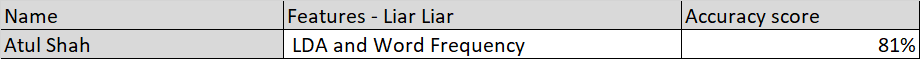


**3. compare with and without amalgamation : how does it affect confusion matrix and metrics**

Accuracy, F1 Scores with and without Amalgamation for both datasets. After amalgamation accuracy improved and details are shown as follows:

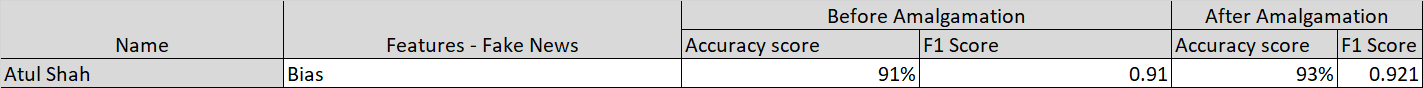

**4. compare with and without distillation: : how does it affect confusion matrix and metrics**

Some of the distillation techniques used are -  Word Cloud, Stop Words, Lemmatization, Stemming and Doc2Vec,TF-IDF, Cosine similarity, LDA. 
Accuracy scores improved after distillation since models responded better to clean data.

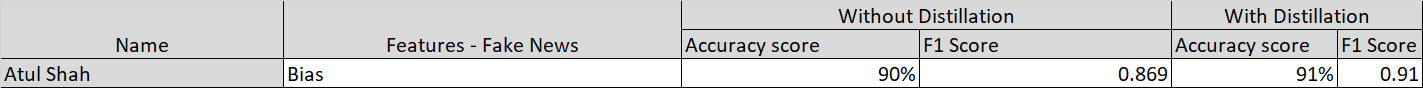

**5. with only liar liar --> then derived /augmented columns --> then dataset2 --> then dataset3 : compare at each step and show how results improve (or not)**

Checked the accuracy on base liar dataset and compared it with fake news dataset with additional derived column. Accuracy was better and has improved the results as per below result sheet. Derived column is shown alongside accuracy score.

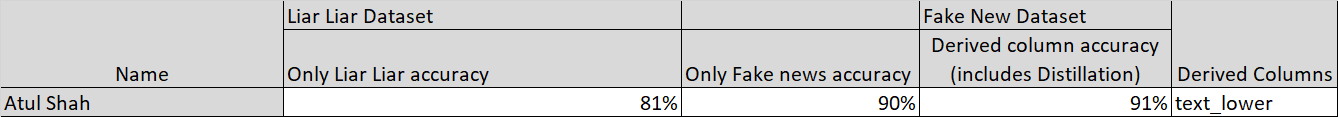

**6. How can we label the bs column and distribute with other labels in the kaggle fake news dataset? What works and what did not work? <balancing text based data set labels>**

Fake News dataset has skewed data especially on 'bs'class. Applied class balancing in Fake News dataset using LDA and Cosine similarity. Below is the screen shot after data distribution. 

After class balancing, we see improvement in model accuracy.

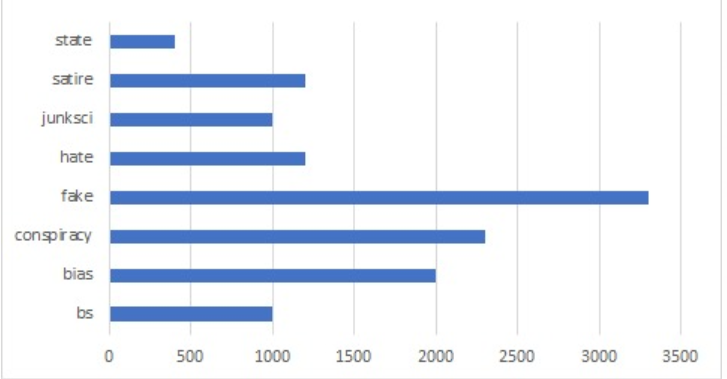




**7. Polynomial equation for multi-class classification : try diff methods : average, weighted average, transformer.**

Tried polymial equation using simple and weighted average. Weighted aveage showed better results. Accuracy scores are used as weights for each of the model's probability scores. Below is the combination polynomial model of other team members models.


    Weighted average for Fake News = 
        prob.append(w[0] * atul_bias_score(sample))
        prob.append(w[1] * sha_reliability_score(sample))
        sumW += w[1]
        prob.append(w[2] * shr_social_credibility_score(sample))
        sumW += w[2]
        prob.append(w[3] * sri_naive_realism_score(sample))
        sumW += w[3]

      Weighted average for Liar Liar Dataset = 
          w = [float(i)/sum(accur) for i in accur]
          sumW = 0
          prob = []
          prob.append(w[0] * DATAMINERS_getAuthorScore(numAuthors))
          sumW += w[0]
          if (headline != ""):
              prob.append(w[2] * DATAMINERS_getClickbaitScore(headline))
              sumW += w[2]
          if (headline != ""):
              prob.append(w[3] * DATAMINERS_getSentimentAnalysisScore(headline))
              sumW += w[3]
          if (headline != ""):
              prob.append(w[4] * DATAMINERS_getLDATopicModellingScore(headline))
              sumW += w[4]
          if (headline != ""):
              prob.append(w[5] * DATAMINERS_getSensationalismScore(headline))
              sumW += w[5]
          if (headline != ""):
              prob.append(w[6] * DATAMINERS_getSpamScore(headline))
              sumW += w[6]
              prob.append(w[8] * DATAMINERS_getWordFrequencyScore(text))
              sumW += w[8]
          if (party != ""):
              prob.append(w[9] * DATAMINERS_getSourceReputationScore(source))
              sumW += w[9]
          if (party != ""):
              prob.append(w[9] * DATAMINERS_getSourceReputationScore(source))
              sumW += w[9]

**8. what are the effects of derived columns on the metrics and scores eg in lair liar, in another data set? eg when I add distillations : LDA, entity recog,  Ranking, Sentiment, etc.**

Using derived columns, and distillation techniques together (LDA, Ranking of topics, and Sentiment analysis), below are the accuracy scores


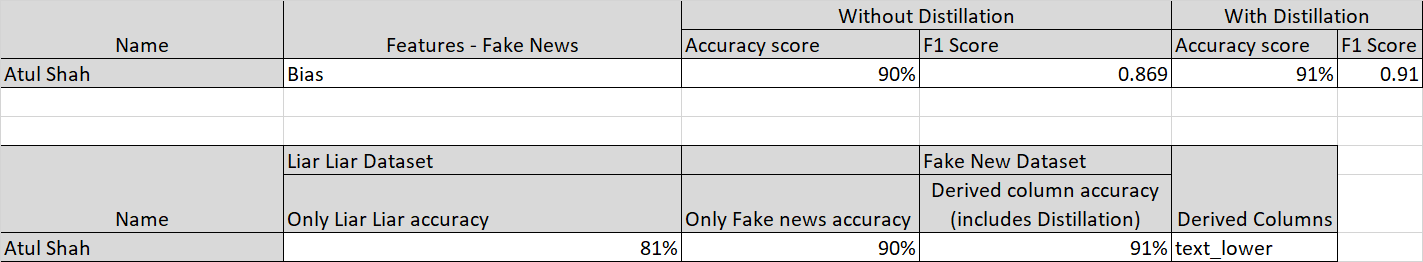

**9. What are your conclusions on how can we improve multi-class classification on the liar liar dataset , what methods work to increase scores/metrics?**

Using probability scores of Fake News model, amalgamation is done with Liar Liar dataset and accuracy scores and F1 Scores seem to improve. Also distillation on liar liar dataset improved the performance of the model.


**10. Use a Transformer in your Factor, eg, multi-class classification, or weights of attentions in your polynomial instead of accuracies.**<br>

Using BERT Transformer and Distilations, pre-processing, tokenization and basic NLTK techniques are applied to text based factors of Fake News dataset. This further helped distill the dataset and improved the accuracy of the model.

**11 Extra credit: Implement a Topic Naming Solution on one of the LDAs from your dataset<bR>**

Performed LDA using word tokenization and created TF-IDF corpus based on bow corpus of words, top 10 topics are found from Liar Liar Dataset and Fake News Dataset.

